(400,)


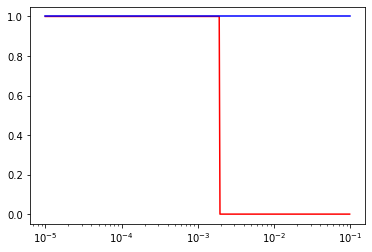

In [4]:
# Test that new formulation deals with underflow better
import matplotlib.pyplot as plt 
import saha 
import numpy as np

# Set up the conditions for test runs 
xi = np.arange(20, 20*50, 2) 
T9 = np.power(10.0, np.arange(-5.0, -1.0, 0.01))
rho = np.ones(T9.shape)*1.0 
Ytot = np.ones(T9.shape)*1.0
lnYef = np.log(np.ones(T9.shape)*0.3)

YIOldMethod = saha.GetAbundancesFixedYef(Ytot, T9, rho, lnYef, xi, True)
YINewMethod = saha.GetAbundancesFixedYef(Ytot, T9, rho, lnYef, xi, False)
print(np.shape(T9))
# Plot the sum of all the ionization state abundances for both cases  
# use nan_to_num to change nans to zeros, as they are caused by dividing by infinity
plt.semilogx(T9, np.nan_to_num(np.sum(YIOldMethod,1)), linestyle='-', color='red')
plt.semilogx(T9, np.nan_to_num(np.sum(YINewMethod,1)), linestyle='-', color='blue')
plt.show()

# Clearly the new method works at all temperatures while the old method dies at ~10^6 K 

In [2]:
# Test bisection for free electron fraction 
import matplotlib.pyplot as plt 
import saha 
import numpy as np

# Set up the conditions for test runs 
xi = np.arange(0, 10, 1) 
xi = 20*np.power(2, xi)
T9 = np.power(10.0, np.arange(-5.0, 0.0, 0.001))
rho = np.ones(T9.shape)*1.0 
Ytot = np.ones(T9.shape)/(len(xi)) 
lnYef = np.log(np.ones(T9.shape)*0.3)

YI = saha.GetAbundances(Ytot, T9, rho, xi)
YIfixed = saha.GetAbundancesFixedYef(Ytot, T9, rho, lnYef, xi)

Yef = np.zeros(T9.shape)
for I in range(len(xi)+1):
    Yef[:] = Yef[:] + I*YI[:,I]

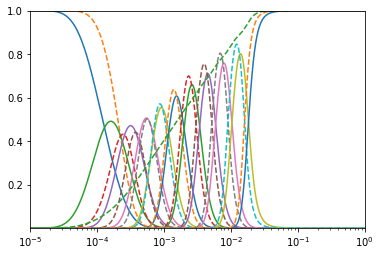

In [3]:
# Plot up a comparison of the fixed YeFree solution and the self-consistent YeFree solution 
for i in range(len(xi)+1): 
    plt.plot(T9, YI[:,i]/Ytot)
    plt.plot(T9, YIfixed[:,i]/Ytot, linestyle='--')

plt.plot(T9, Yef, linestyle='--')
plt.yscale('linear')
plt.xscale('log')
plt.ylim([1.e-4, 1])
plt.xlim([1.e-5, 1])
plt.show()